In [1]:
import parametric_fz as pfz
import matplotlib.pyplot as plt
import numpy as np
import compute_charge_dist as fz

%matplotlib inline

Loading the library to compute the charge distribution of dust grains.


nH   = [ 0.9,           36,       2.995e+04]
T    = [    7e+03,      7e+01 ,   14.4]
G    = [    1.52  ,     0.60  ,   0.00071]
xe   = [   0.012  ,     0.00018 , 9.9e-8]
ne   = [   0.011 ,      0.0063  , 0.00296637]
xH2  = [  4.6e-05  ,    0.15 ,    0.9941]
Av   = [   0.046  ,     0.42  ,   6.603]
Ntot = [  8.5e+19  ,    7.8e+20,  1.235e+22]

In [2]:
grain_type = "silicate"
grain_size = 250

nH   = 0.9
temp = 7e+03
G    = 1.52
xe   = 0.012
ne   = 0.011
xH2  = 4.6e-05
Av   = 0.046 
Ntot = 8.5e+19
fH2  = 0.11
NH2 = fz.get_NH2(fH2, temp)

In [3]:
print("%.3g"%NH2)

7.92e+15


In [4]:
ZZpar, fzpar = pfz.get_fz(ntot=nH, T=temp, xe=xe, Ntot=Ntot, NH2=NH2, grain_type=grain_type, grain_size=grain_size, xH2=xH2, G0=1.7, correct_edens=True)
zcent, zwidth = pfz.get_fz(ntot=nH, T=temp, xe=xe, Ntot=Ntot, NH2=NH2, grain_type=grain_type, grain_size=grain_size, xH2=xH2, G0=1.7, correct_edens=True, output="zcent")

In [5]:
zeta = fz.get_zeta(Ntot)

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, 0], [xe, 0], xH2, temp, zeta, grain_size, Ntot, grain_type, Qabs, G0=1.7)
JCRe, JCRpe, ZZnew     = fz.compute_CR_currents(nH, zeta, grain_size, grain_type, Qabs)

zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, ZZall, grain_size, grain_type)
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, 0], [xe, 0], temp, grain_size, Ntot, grain_type, Qabs, zeta, zeq=zeq, includeCR=True, G0=1.7)

ffz, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=True)

Zm     = fz.get_Zmode(ZZ, ffz)
zmode  = Zm

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
zmean     = avg
zstd      = std

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


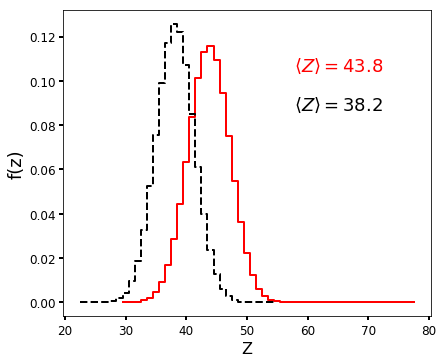

In [6]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_axes([0.05, 0.05, 0.85, 0.85])

ax.plot(ZZ+0.5, ffz, "-r", linewidth=2, drawstyle='steps', alpha=1.0)
ax.plot(ZZpar+0.5, fzpar, "--k", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_ylabel("f(z)", fontsize=18)
ax.set_xlabel("Z", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.75*ZZ[-1], 0.9*np.max(ffz), "$\\langle Z \\rangle = $%.1f"%zmean, color="red", fontsize=18)
ax.text(0.75*ZZ[-1], 0.75*np.max(ffz), "$\\langle Z \\rangle = $%.1f"%zcent, color="k", fontsize=18)

fig.show()

In [33]:
print()

()
